In [1]:
import sys
sys.path.append("..")
from utils import fit_and_plot, montecarlo_estimator
import numpy as np
import pandas as pd

[[3.54193130e-15 4.53431674e-16]
 [4.08406996e+14 2.04258255e+13]]


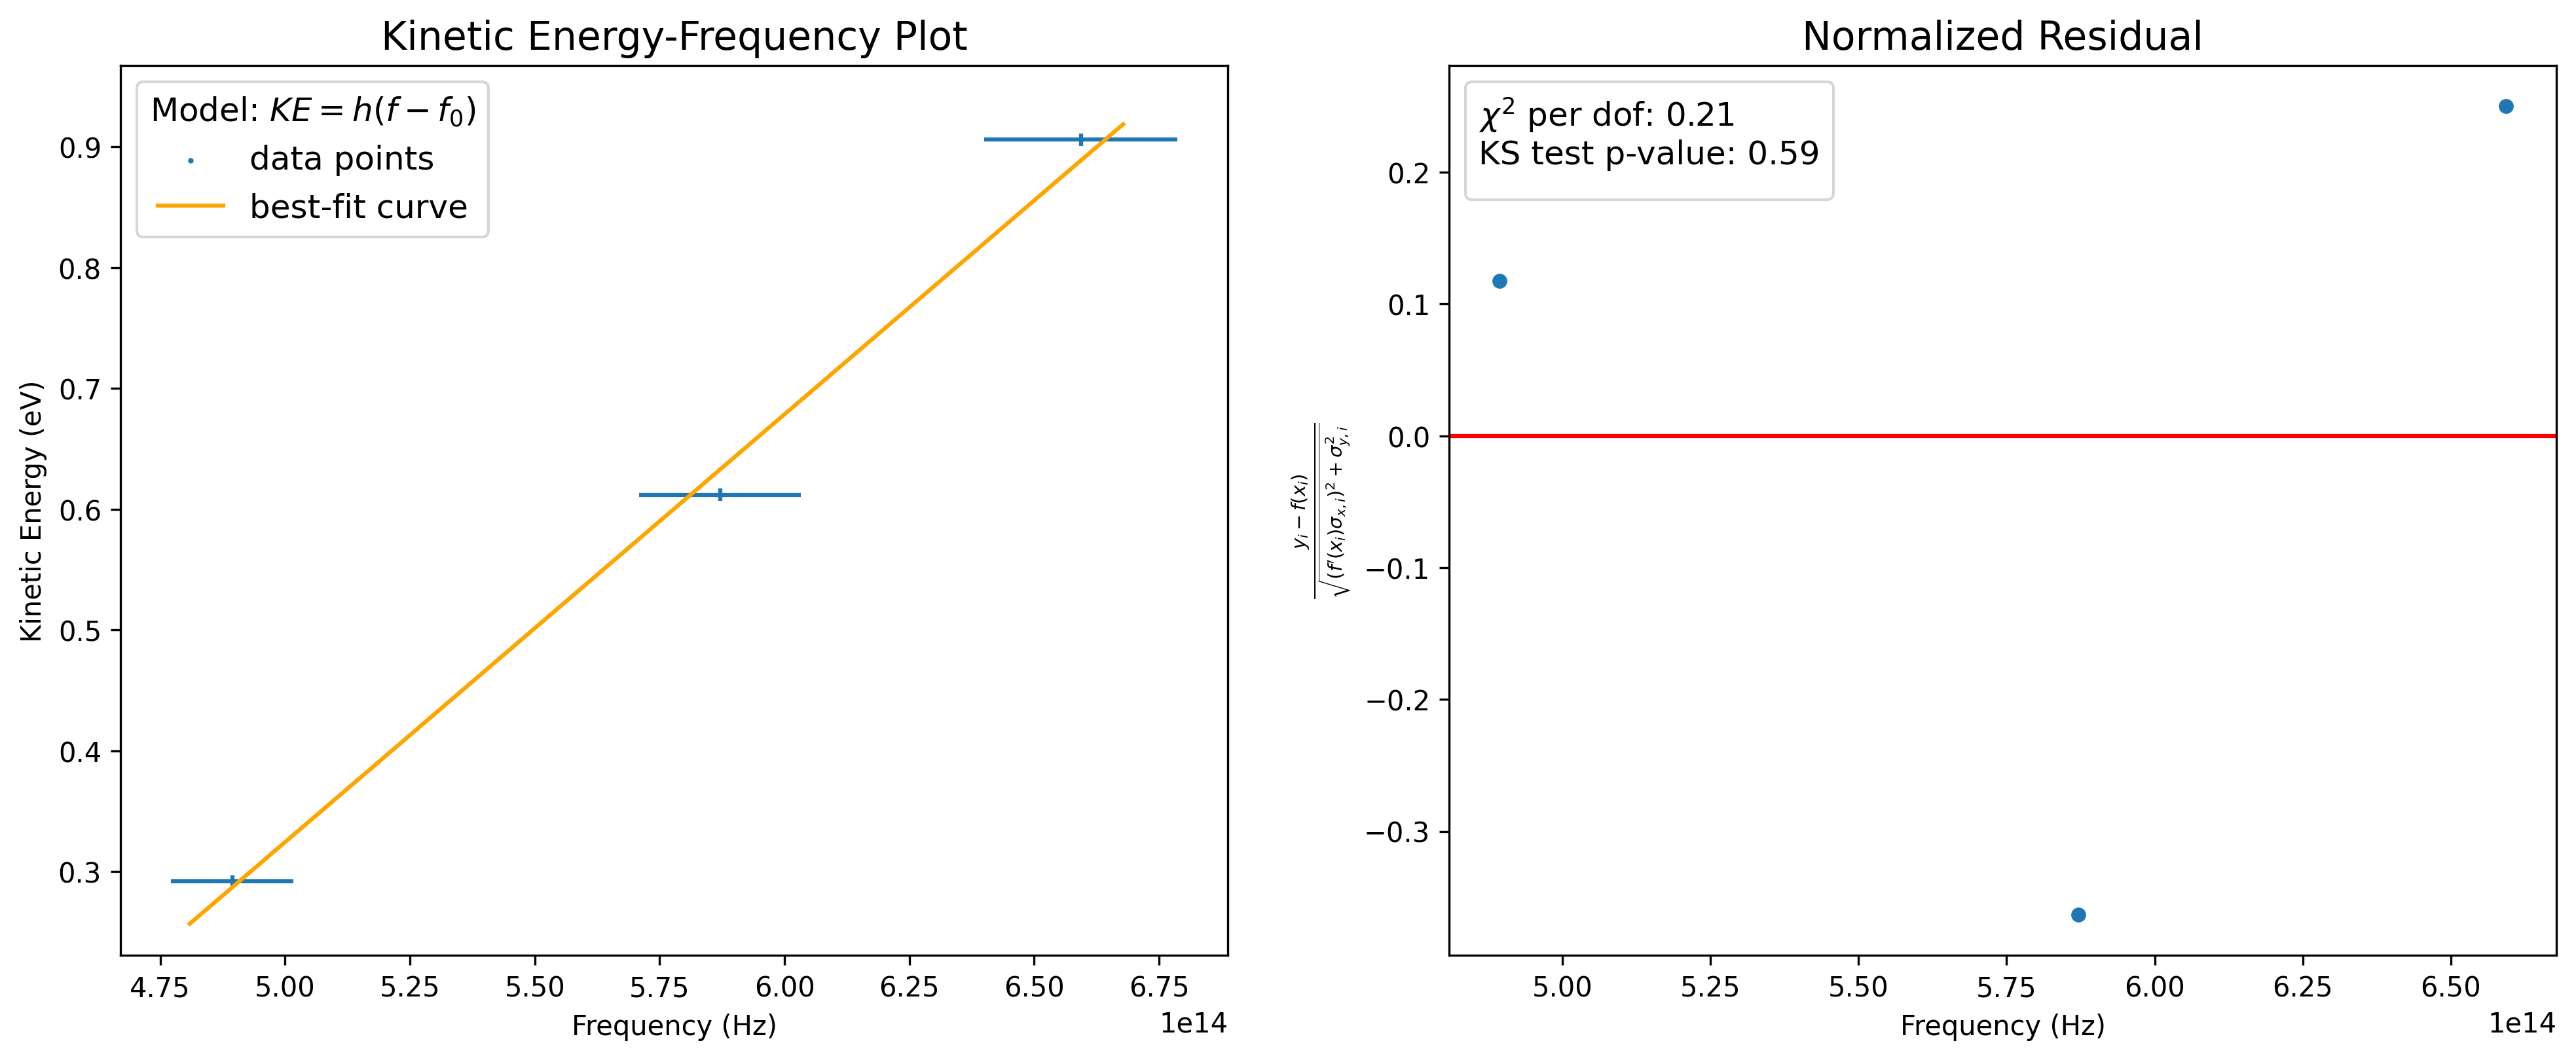

In [2]:
class ExpModel:
    def forward(self, f, h, f0 = 4.62e14):
        return h*(f-f0)
    def backward(self, f, h, f0 = 4.62e14):
        return  -h
expmodel = ExpModel()
l = np.array([613, 511, 455]).astype(np.double)
# l = np.array([607, 495, 429]).astype(np.double)
l_sig = np.array([15.35, 14.05, 13.36]).astype(np.double)
f = 3e17/l
f_sig = 3e17/l**2*l_sig 
ke = np.array([0.292, 0.612, 0.906]).astype(np.double)
ke_sig = np.array([0.005]*3).astype(np.double)
fit_and_plot(
    expmodel,
    f, 
    ke,
    f_sig,
    ke_sig,
    2,
    [4.13e-15, 4.62e14],
    "Frequency (Hz)",
    "Kinetic Energy (eV)",
    "Kinetic Energy-Frequency Plot",
    r"$KE = h(f- f_0)$",
    True,
    );

[[3.81430184e-15 5.18428187e-17]
 [4.16971303e+14 2.82382963e+12]]


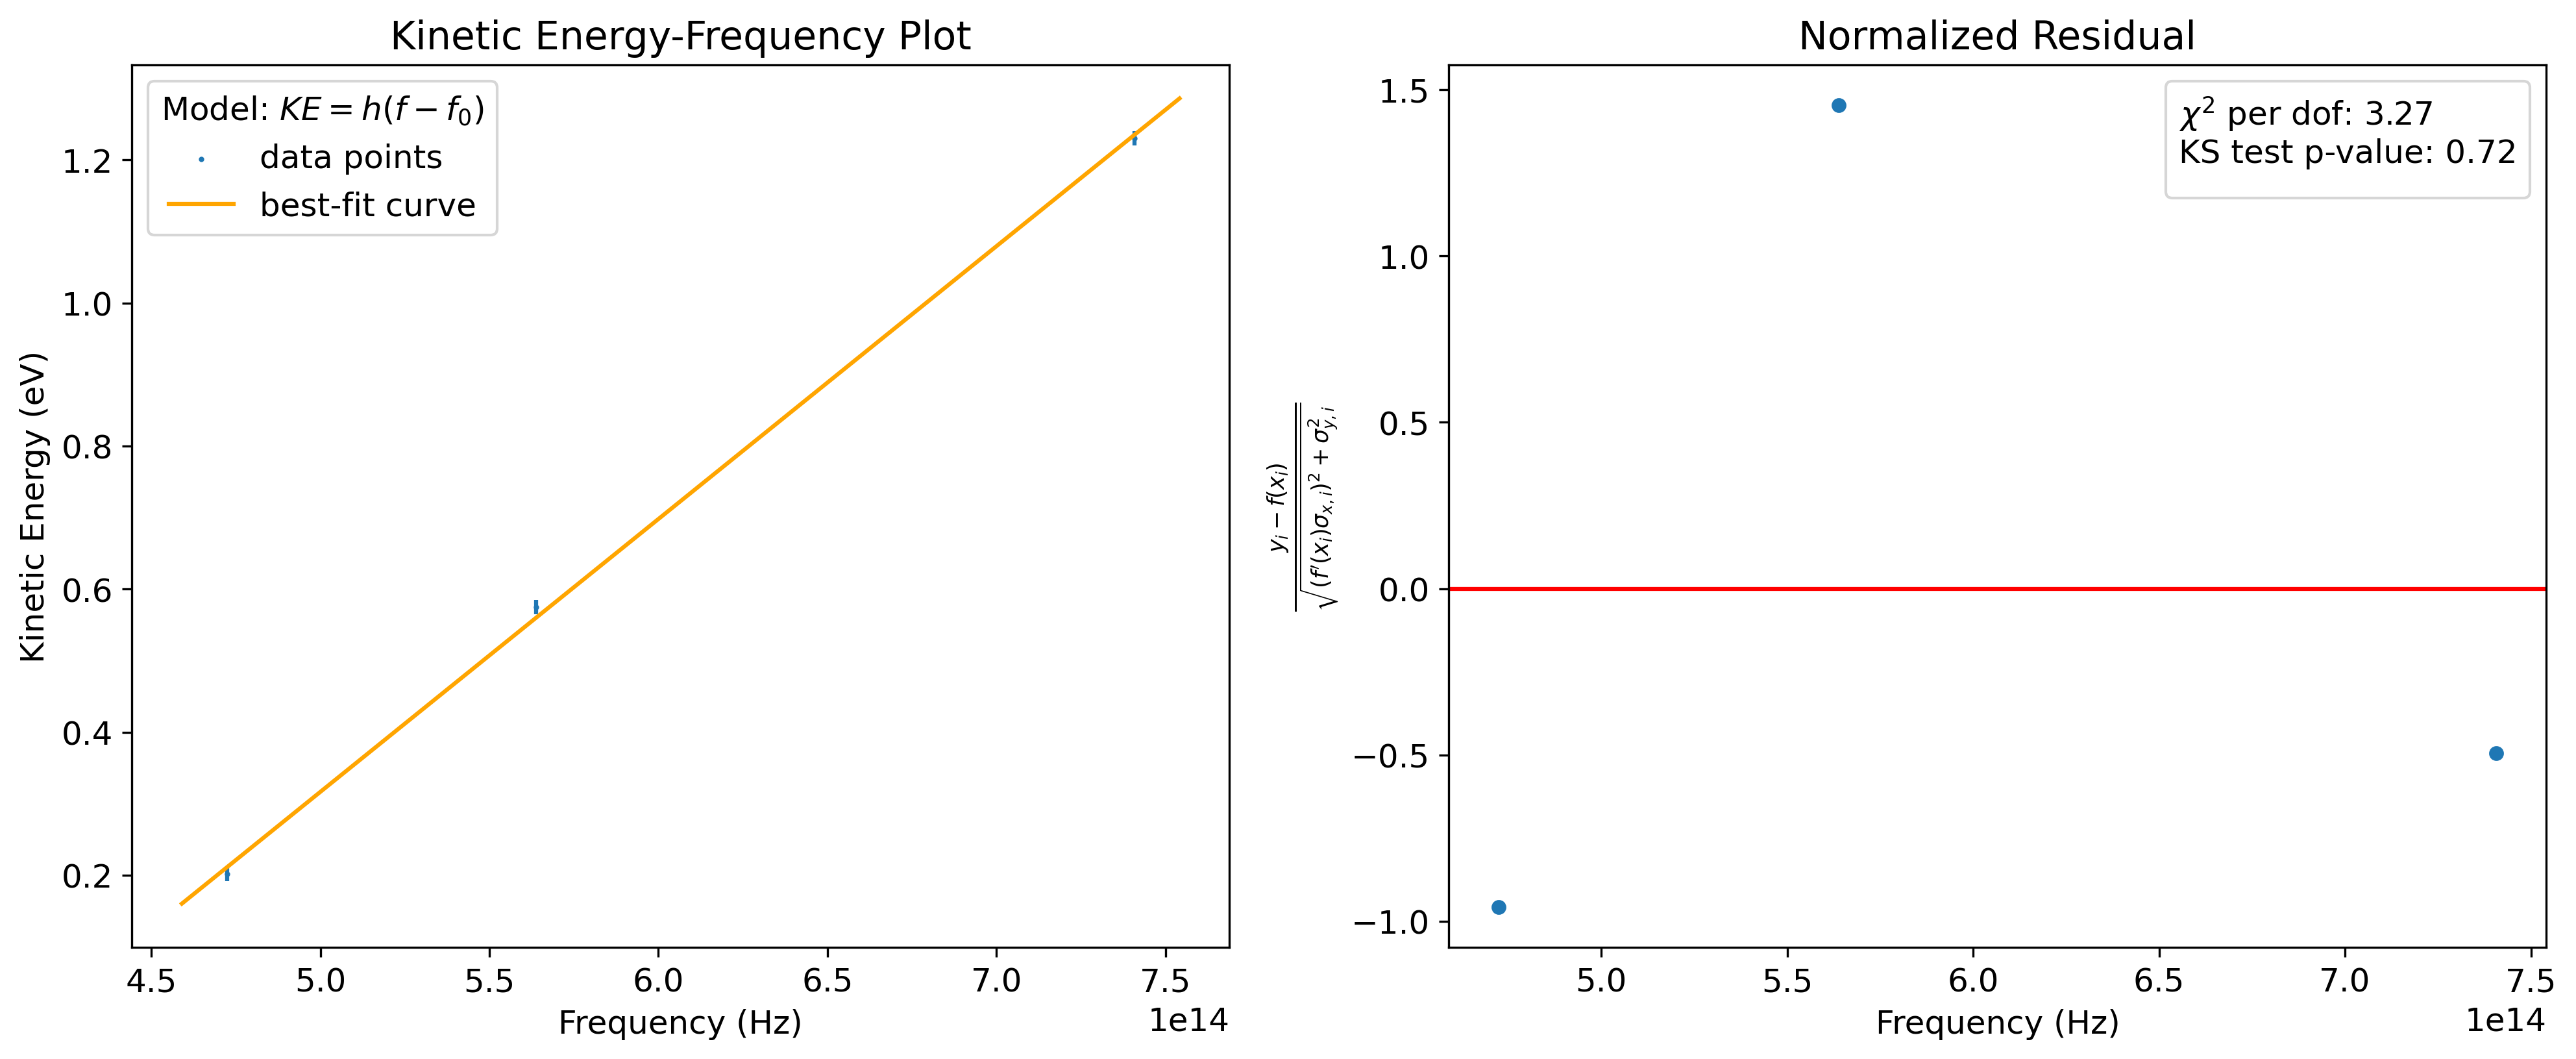

In [3]:
class ExpModel:
    def forward(self, f, h, f0 = 4.62e14):
        return h*(f-f0)
    def backward(self, f, h, f0 = 4.62e14):
        return  -h
expmodel = ExpModel()
l = np.array([405, 532, 635]).astype(np.double)
l_sig = np.array([0, 0, 0]).astype(np.double)
f = 3e17/l
f_sig = 3e17/l**2*l_sig 
ke = np.array([1.23, 0.575, 0.202]).astype(np.double)
ke_sig = np.array([0.01]*3).astype(np.double)
fit_and_plot(
    expmodel,
    f, 
    ke,
    f_sig,
    ke_sig,
    2,
    [4.13e-15, 4.62e14],
    "Frequency (Hz)",
    "Kinetic Energy (eV)",
    "Kinetic Energy-Frequency Plot",
    r"$KE = h(f- f_0)$",
    True,
    );

In [4]:
df = pd.read_csv("../data/5CL Lab 4 - Experiment 5.csv", skiprows=1, nrows=22)
df =df[df["LED Intensity Conv. (Lux)"] > 0]

[[ 0.52254882  0.08828371]
 [ 0.87037138  0.04758732]
 [-0.08818267  0.04509195]]


<ipython-input-16-a5f67f011659>:3: RuntimeWarning: invalid value encountered in power
  return a*np.power(x, b) + c*x


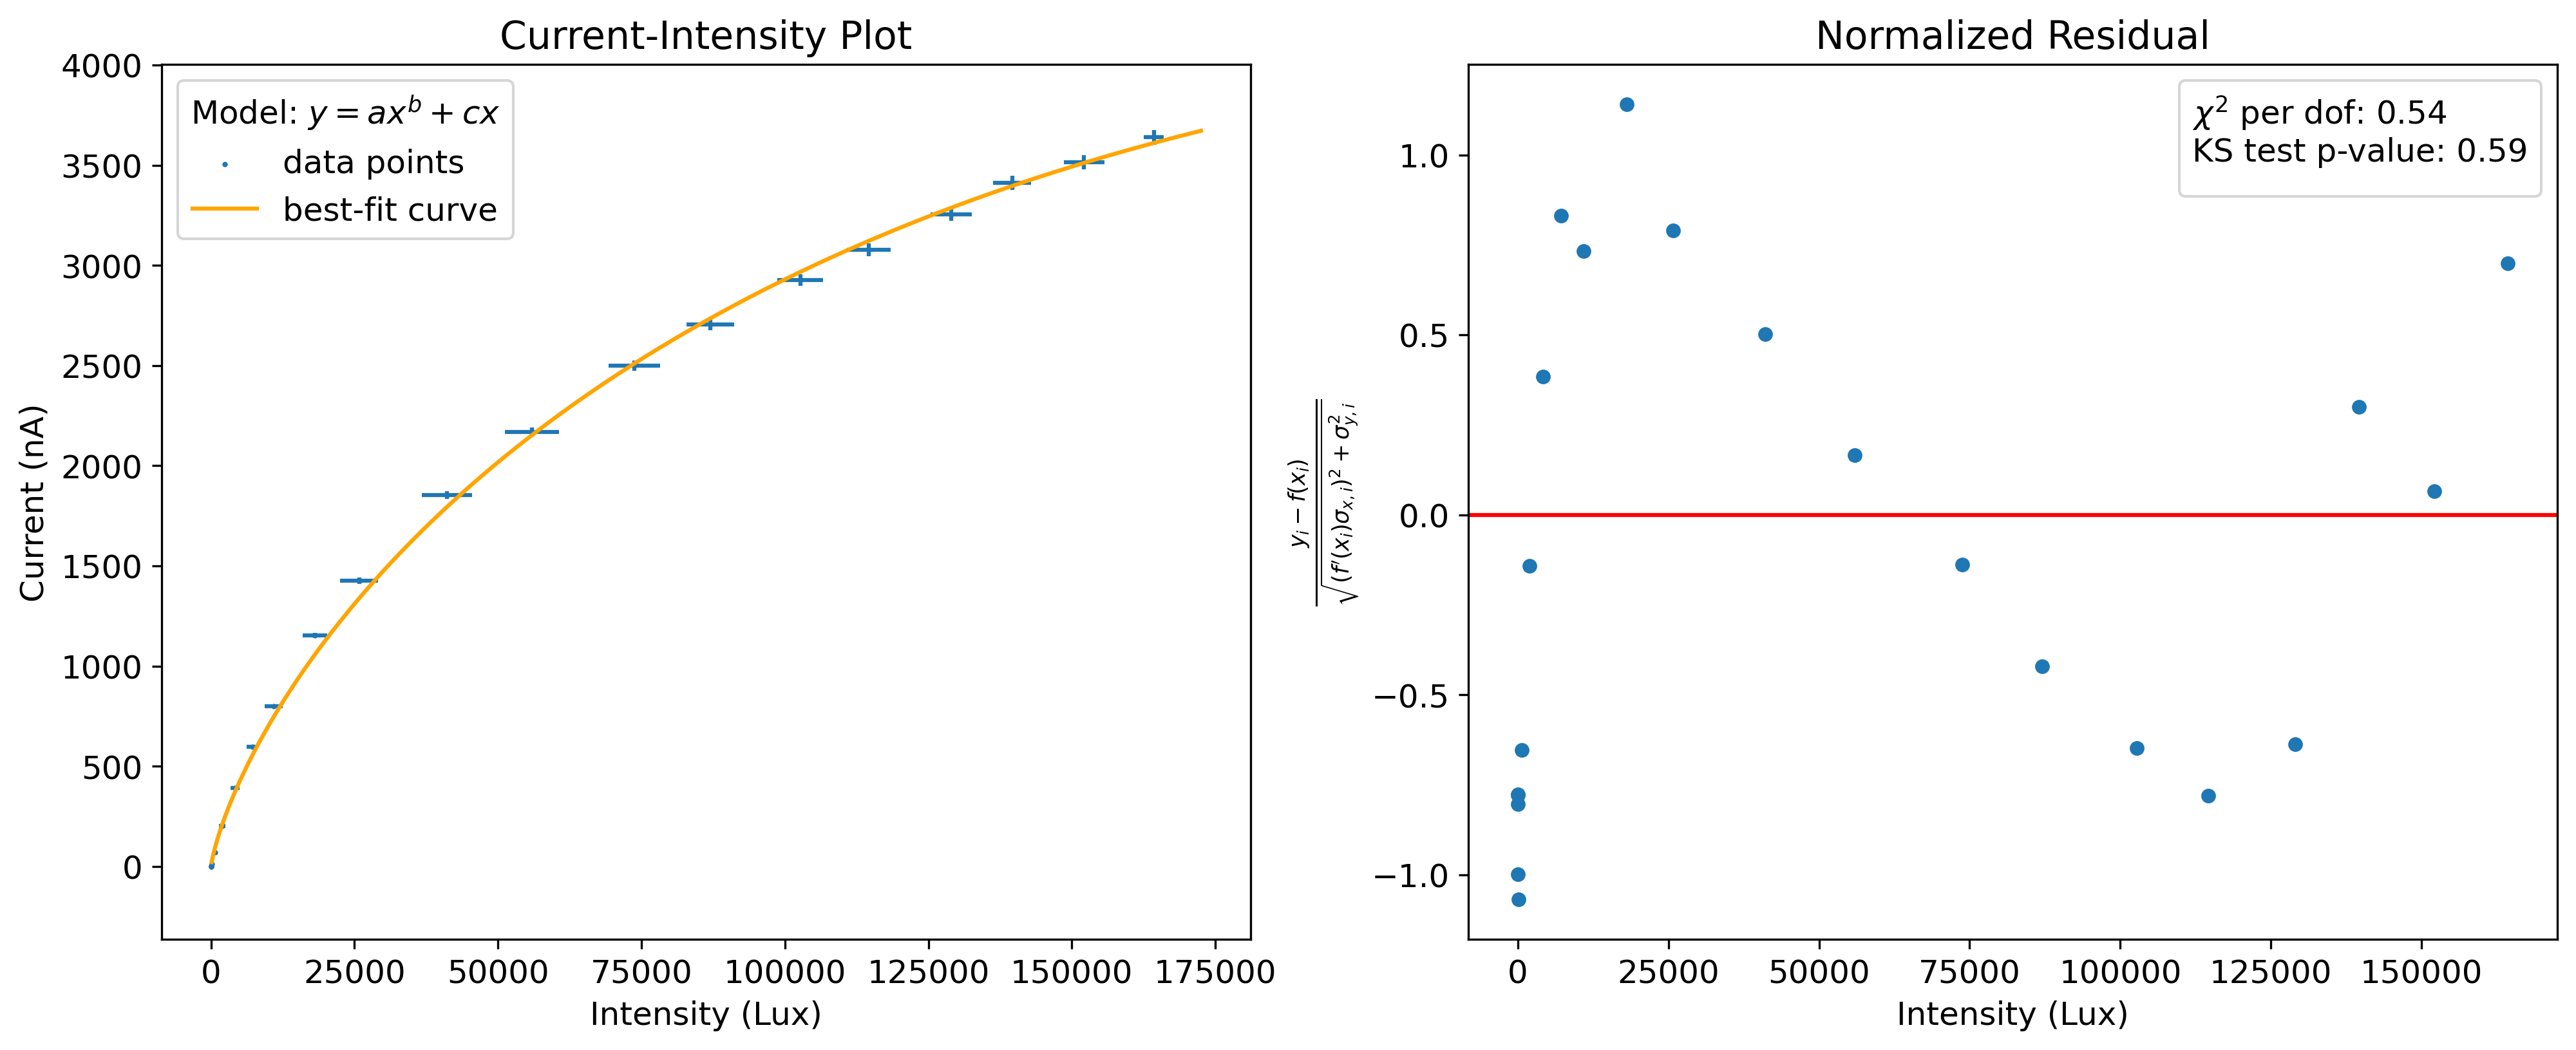

In [16]:
class ExpModel:
    def forward(self, x, a, b, c):
        return a*np.power(x, b) + c*x
    def backward(self, x, a, b, c):
        return a*np.power(x, b-1)*b + c
expmodel = ExpModel()
Intensity = df["LED Intensity Conv. (Lux)"].to_numpy()
I_sig = 0.5*(Intensity[1:] - Intensity[:-1])
I_sig = np.convolve(I_sig, np.array([0.5]*2), mode='full')/np.sqrt(3)
Current = df["Tube Current (mA)"]
Current_sig = Current/100 + 1
fit_and_plot(
    expmodel, 
    Intensity,
    Current,
    I_sig,
    Current_sig,
    3,
    [0.9, 0.7, 0],
    "Intensity (Lux)",
    "Current (nA)",
    "Current-Intensity Plot",
    r"$y = ax^b + cx$",
    True,
    );

[[ 8.65102198e-03  6.12829678e-04]
 [ 8.99367087e-06  8.85443401e-07]
 [-8.85833462e+03  3.18412155e+02]
 [ 2.39437413e+03  1.32822888e+02]]


<ipython-input-19-17fbf32e5021>:6: RuntimeWarning: invalid value encountered in log
  output[~mask] = a/b*np.log(np.exp(b*(x[~mask]-c))-1) + d


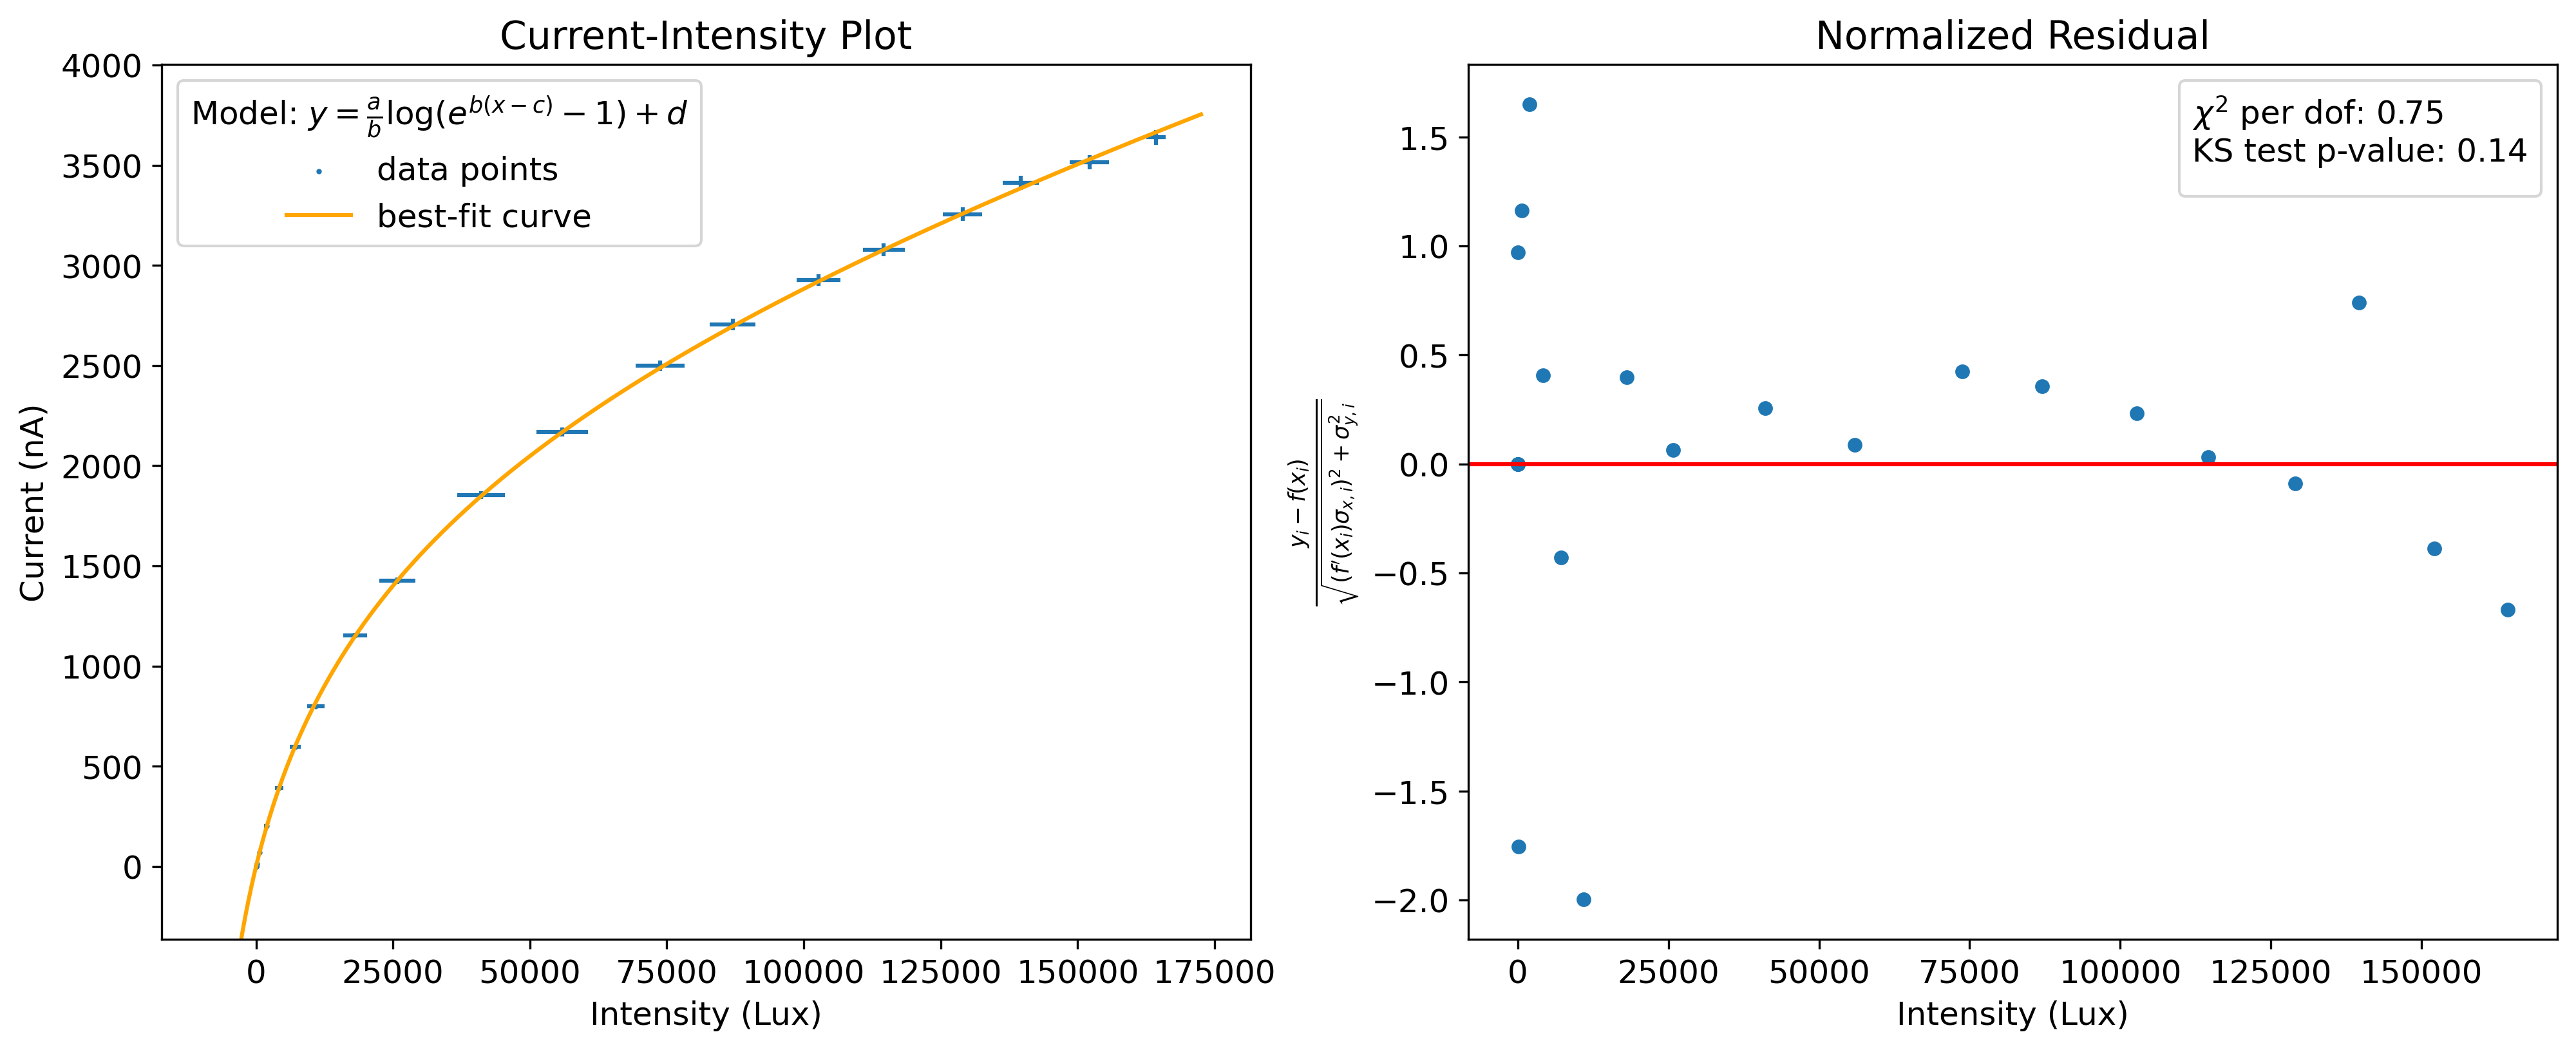

In [19]:
class ExpModel:
    def forward(self, x, a, b, c, d):
        output = np.zeros_like(x)
        mask = b*(x-c) > 20
        output[mask] = a*(x[mask]-c) + d
        output[~mask] = a/b*np.log(np.exp(b*(x[~mask]-c))-1) + d
        return output
    def backward(self, x, a, b, c, d):
        output = np.zeros_like(x)
        mask = b*(x-c) > 20
        output[mask] = a
        output[~mask] = a/b/(np.exp(b*(x[~mask]-c))-1)*b*np.exp(b*(x[~mask]-c))
        return output
expmodel = ExpModel()
Intensity = df["LED Intensity Conv. (Lux)"].to_numpy()
I_sig = 0.5*(Intensity[1:] - Intensity[:-1])
I_sig = np.convolve(I_sig, np.array([0.5]*2), mode='full')/np.sqrt(3)
Current = df["Tube Current (mA)"]
Current_sig = Current/100 + 1
fit_and_plot(
    expmodel, 
    Intensity,
    Current,
    I_sig,
    Current_sig,
    3,
    [1, 1e-5, 1, 1],
    "Intensity (Lux)",
    "Current (nA)",
    "Current-Intensity Plot",
    r"$y = \frac{a}{b}\log(e^{b(x-c)} - 1)+d$",
    True,
    );